<a href="https://colab.research.google.com/github/Yuvraajb/stock-prediction/blob/main/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


In [3]:
#collect and clean data using pandas
df = pd.read_csv('stocks.csv') #df is data frame
df = df.dropna() #removes missing data

df

,Date,Open,High,Low,Close,Volume
0,09/06/2024,223.95,225.24,219.77,220.82,"48,423,008"
1,09/05/2024,221.63,225.48,221.52,222.38,"36,615,398"
2,09/04/2024,221.66,221.78,217.48,220.85,"43,840,199"
3,09/03/2024,228.55,229.00,221.17,222.77,"50,087,200"
4,08/30/2024,230.19,230.40,227.48,229.00,"52,990,770"
...,...,...,...,...,...,...
248,09/12/2023,179.49,180.13,174.82,176.30,"90,370,195"
249,09/11/2023,180.07,180.30,177.34,179.36,"58,953,047"
250,09/08/2023,178.35,180.24,177.79,178.18,"65,602,070"
251,09/07/2023,175.18,178.21,173.54,177.56,"112,488,797"


<Axes: xlabel='Date'>

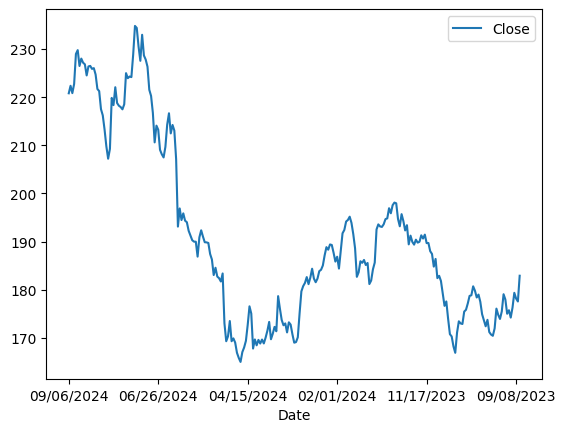

In [8]:
#visualise the data
df.plot(x="Date",y="Close")

In [9]:
#create the model
model = RandomForestRegressor()

In [13]:
# Train the rain forest regression model
x = df[['Open','High','Low','Volume']] # creates an array x with columns as open, high, low, volume
x = x[:int(len(df)-1)] #removes the last row from the array as the last row will be the row that the model is going to predict

# Convert the 'Volume' column to numeric values
x['Volume'] = x['Volume'].str.replace(',', '').astype(float)

y = df['Close']
y = y[:int(len(df)-1)] # takes all close price except the one in the last row
model.fit(x,y) # fit is another term for train so this line means that the model is to be trained

RandomForestRegressor()

In [14]:
# Test the model
predictions = model.predict(x)
print("Model score is: ", model.score(x,y)) #  used to evaluate the performance of a trained model.

Model score is:  0.9993272218734739


In [16]:
# Make predictions
newData = df[['Open','High','Low','Volume']].tail(1)

# Convert the 'Volume' column to numeric values in newData
newData['Volume'] = newData['Volume'].str.replace(',', '').astype(float)

prediction = model.predict(newData)
print('The model predicts the last row: ',prediction) # shows the predicted price by the model
print('The actual value is: ',df[['Close']].tail(1).values[0][0]) #shows the last row or the actual price that was

The model predicts the last row:  [184.9883]
The actual value is:  182.91
